# Report 3: Predicting CLABSI in PICU Patients

> Team members: Pavan Kumar Theegela, Taha Mandviwala, Jyothika Sakamuri

## CLABSI Background:

A central line-associated bloodstream infection (CLABSI) is a serious healthcare-associated infection that occurs if bacteria gain entry to the blood through a central line within 48 hours of insertion. This type of infection has the capability to be particularly dangerous to severely ill patients or immunocompromised patients and can subject them to life-threatening risks. CLABSI does not infect the patients alone but also causes a tremendous burden to the healthcare facilities where the patients are admitted. The consequences of CLABSI are very adverse, bringing about complications that are harmful to the recovery of the patient along with the hospital.

Clinical Impact:
Central Line-Associated Bloodstream Infections (CLABSIs) significantly increase the risk of complications and even death, particularly in patients relying on invasive medical devices such as central venous catheters (CVCs), intravenous (IV) lines, and procedures involving direct bloodstream access like blood transfusions and parenteral nutrition. In pediatric intensive care units (PICUs), bloodstream infections are responsible for nearly one-third of hospital-acquired infections, with a mortality rate of 18%. Wylie et al. emphasize the importance of identifying risk factors to develop effective preventive measures that can reduce avoidable infections. Recognizing these risks early enables healthcare providers to implement targeted interventions, improving patient outcomes and treatment plans.

Economic Impact:
Beyond the clinical consequences, CLABSIs impose a heavy financial burden on hospitals. These infections not only strain medical resources but also lead to prolonged hospital stays, delaying bed availability for other patients. Research by Elward et al. indicates that bloodstream infections significantly drive up costs, with PICU expenses increasing by approximately $45,615 for infected patients and $39,219 for non-infected patients. Addressing CLABSI prevention is crucial in mitigating these financial strains while enhancing overall healthcare efficiency.


## Research understanding:


Objective:
The goal of this project is to develop a machine learning (ML) model capable of predicting central-line patients at high risk of developing a bloodstream infection (CLABSI). By identifying high-risk patients early, healthcare providers can proactively intervene with targeted, high-cost preventive measures, ultimately improving patient outcomes and optimizing resource utilization.

Problem Statement:
Central-line-associated bloodstream infections (CLABSIs) are a significant concern in healthcare settings, often leading to prolonged hospital stays, increased medical costs, and higher mortality rates. Traditional infection control measures, though effective, are often reactive rather than proactive. A predictive ML model can assist clinicians in assessing the likelihood of CLABSI development, enabling timely intervention before an infection occurs.

Research Scope:

Machine learning (ML) algorithms are used to identify patients at risk of developing CLABSI. The primary objective of this project is to design and implement an ML model that can accurately predict CLABSI cases. A key focus of this work is fine-tuning the model to enhance its accuracy, ensuring reliable identification of high-risk patients for timely intervention.

Challenges:

The dataset used for this study is highly imbalanced, with significantly fewer CLABSI cases compared to non-CLABSI patients. Additionally, the data includes time-series dependencies, where patient measurements are recorded over time. This can challenge the assumption of independent observations, potentially affecting the accuracy of our analysis. To ensure the success of this study, it is crucial to address these issues effectively.

## Data Understanding

#### Importing Library for Python and load the sample DATASET

In [1]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

df_predicting_clabsi = pd.read_csv('bzan6361_clabsi_1.csv')

/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/3357223237.py:4: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicting_clabsi = pd.read_csv('bzan6361_clabsi_1.csv')


#### Data examination

In [4]:
# Find rows that are duplicated in the DataFrame
duplicate_rows = df_predicting_clabsi.duplicated()

# Count the total number of duplicated rows
num_duplicates = duplicate_rows.sum()  # Summing True values gives the total count

# Print the total number of duplicate rows
print(f"Total duplicated rows in the dataset: {num_duplicates}")

# If any duplicates exist, display them for review
if num_duplicates > 0:
    print("\nDuplicated rows found:")
    print(df_predicting_clabsi[duplicate_rows])

Total duplicated rows in the dataset: 0


In [5]:
# Calculate the total number of elements in the dataset (representing all patient records)
total_elements = df_predicting_clabsi.size

# Output the overall count of elements (total rows × total columns)
print("Total number of elements in the dataset (rows × columns):")
print(total_elements)
# Retrieve the total number of rows (records) and columns (features) from the DataFrame
num_rows, num_columns = df_predicting_clabsi.shape

# Print the dataset's dimensions
print("Dataset size (number of records and attributes):")
print(f"Rows: {num_rows}, Columns: {num_columns}")


Total number of elements in the dataset (rows × columns):
3957608


In [6]:
# Retrieve the total number of rows (records) and columns (features) from the DataFrame
num_rows, num_columns = df_predicting_clabsi.shape

# Print the dataset's dimensions
print("Dataset size (number of records and attributes):")
print(f"Rows: {num_rows}, Columns: {num_columns}")

Dataset size (number of records and attributes):
Rows: 14236, Columns: 278


#### Showing attribute names and corresponding data types

In [7]:
# Get the data type of each column in the DataFrame
data_types = df_predicting_clabsi.dtypes

# Print the data types for all columns
print("Data types for each column in the dataset:")
print(data_types)

Data types for each column in the dataset:
PatientKey          int64
EncounterKey        int64
Date               object
InsertionDate      object
AgeGroup           object
                    ...  
CVICUDaysLast30     int64
ICUDaysLast15       int64
ICUDaysLast5        int64
ICUDaysLast3        int64
ICUDaysLast2        int64
Length: 278, dtype: object


In [8]:
# Determine the number of missing values in each column of the DataFrame
missing_values = df_predicting_clabsi.isnull().sum()

# Print the missing value count for each column
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
PatientKey         0
EncounterKey       0
Date               0
InsertionDate      0
AgeGroup           0
                  ..
CVICUDaysLast30    0
ICUDaysLast15      0
ICUDaysLast5       0
ICUDaysLast3       0
ICUDaysLast2       0
Length: 278, dtype: int64


In [9]:
# Identify columns that contain missing values
missing_columns = df_predicting_clabsi.columns[df_predicting_clabsi.isnull().any()]

# Count the number of columns with missing values
total_missing_columns = len(missing_columns)
print(f"\nTotal columns with missing values: {total_missing_columns}")

# Compute the number of missing values in each of these columns
missing_counts = df_predicting_clabsi[missing_columns].isnull().sum()

# Display the missing value counts for each column, with a serial number
print("\nMissing values per column:")
for i, (column, count) in enumerate(zip(missing_counts.index, missing_counts), start=1):
    print(f"{i}. {column}: {count} missing values")

# Create a copy of the DataFrame to add missing value indicators while preserving the original data
df_predicting_clabsi_with_flags = df_predicting_clabsi.copy()

# Add indicator columns showing whether a value is missing (1) or present (0) for each affected column
for idx, column in enumerate(missing_columns, start=1):
    df_predicting_clabsi_with_flags[f"{column}_missing_flag_{idx}"] = df_predicting_clabsi_with_flags[column].isnull().astype(int)



Total columns with missing values: 47

Missing values per column:
1. DepartmentDSC: 325 missing values
2. ClabsiDTS: 12713 missing values
3. DaysToCLABSI: 13143 missing values
4. MostRecentClabsiDTS: 13003 missing values
5. FlushedToday: 1472 missing values
6. FlushedLast4: 1472 missing values
7. FlushedLast7: 1472 missing values
8. FlushedLast10: 1472 missing values
9. CapChangesLastToday: 1472 missing values
10. CapChangesLast4: 1472 missing values
11. CapChangesLast7: 1472 missing values
12. CapChangesLast10: 1472 missing values
13. DressingChangesLastToday: 1472 missing values
14. DressingChangesLast4: 1472 missing values
15. DressingChangesLast7: 1472 missing values
16. DressingChangesLast10: 1472 missing values
17. TubingChangesLastToday: 1472 missing values
18. TubingChangesLast4: 1472 missing values
19. TubingChangesLast7: 1472 missing values
20. TubingChangesLast10: 1472 missing values
21. LastAnc: 198 missing values
22. LastAncDate: 198 missing values
23. LastAncDelta: 1134 

#### Create visualization for missing values

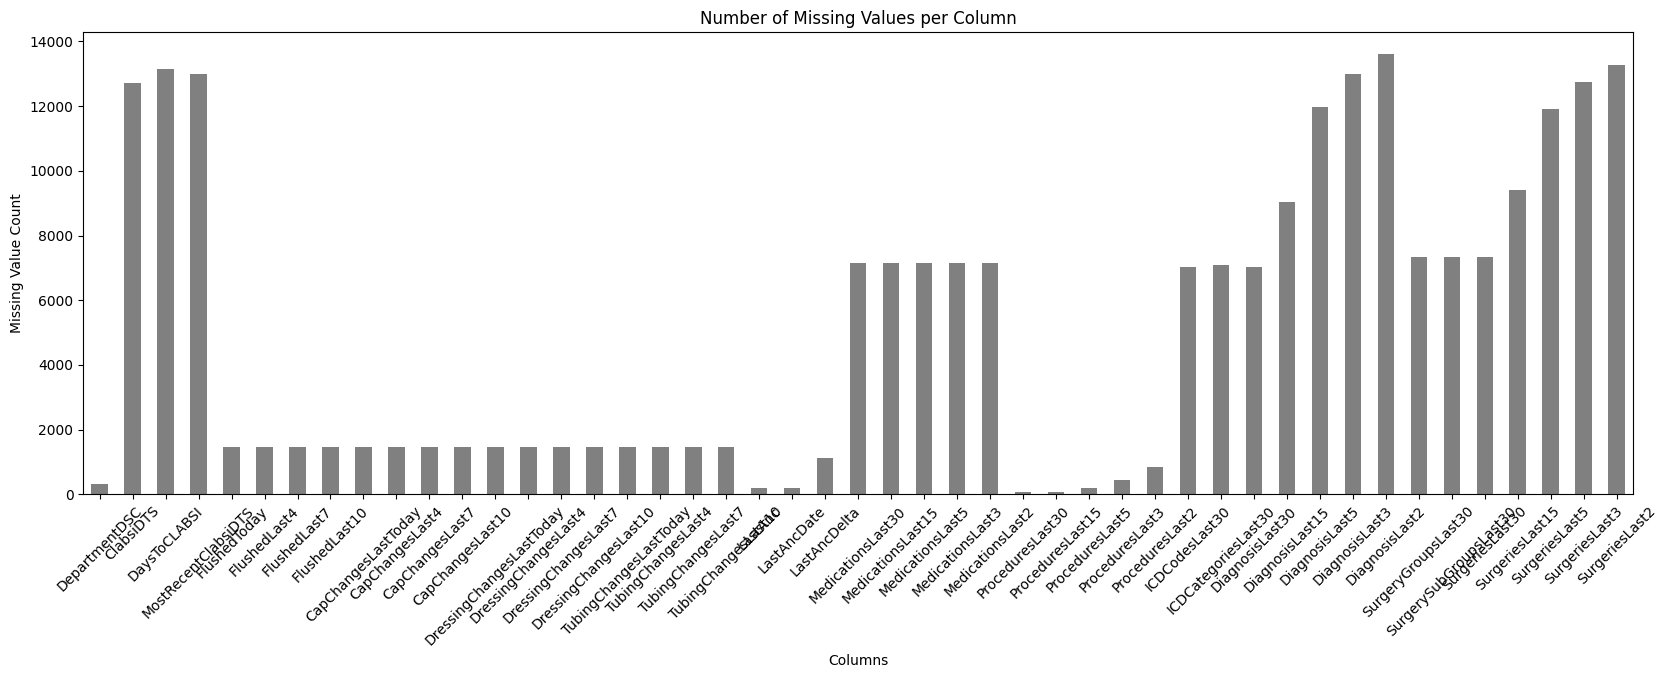

In [10]:
import matplotlib.pyplot as plt

# Calculate the number of missing values in each column
missing_counts = df_predicting_clabsi.isnull().sum()

# Select only columns that contain missing values
columns_with_missing = missing_counts[missing_counts > 0]

# Generate a bar chart to visualize missing value distribution across columns
columns_with_missing.plot(kind='bar', figsize=(20, 6), color='gray')

# Set a descriptive title for the chart
plt.title('Number of Missing Values per Column')

# Label the x-axis to indicate the corresponding columns
plt.xlabel('Columns')

# Label the y-axis to represent the count of missing values
plt.ylabel('Missing Value Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Exploratory Data Analysis (EDA)


The primary objective of exploratory data analysis (EDA) is to uncover patterns and insights that support informed decision-making. In this context, EDA focuses on analyzing patient age groups and their relationship with CLABSI through data visualization and summary statistics. By leveraging EDA techniques, we can gain a deeper understanding of the dataset, making it easier to identify trends, distributions, and potential correlations. This process is essential for generating hypotheses, guiding further analysis, and shaping intervention strategies or research directions based on data-driven findings.


#### Visualization of CLABSI by patient ages

In [11]:
!pip install seaborn


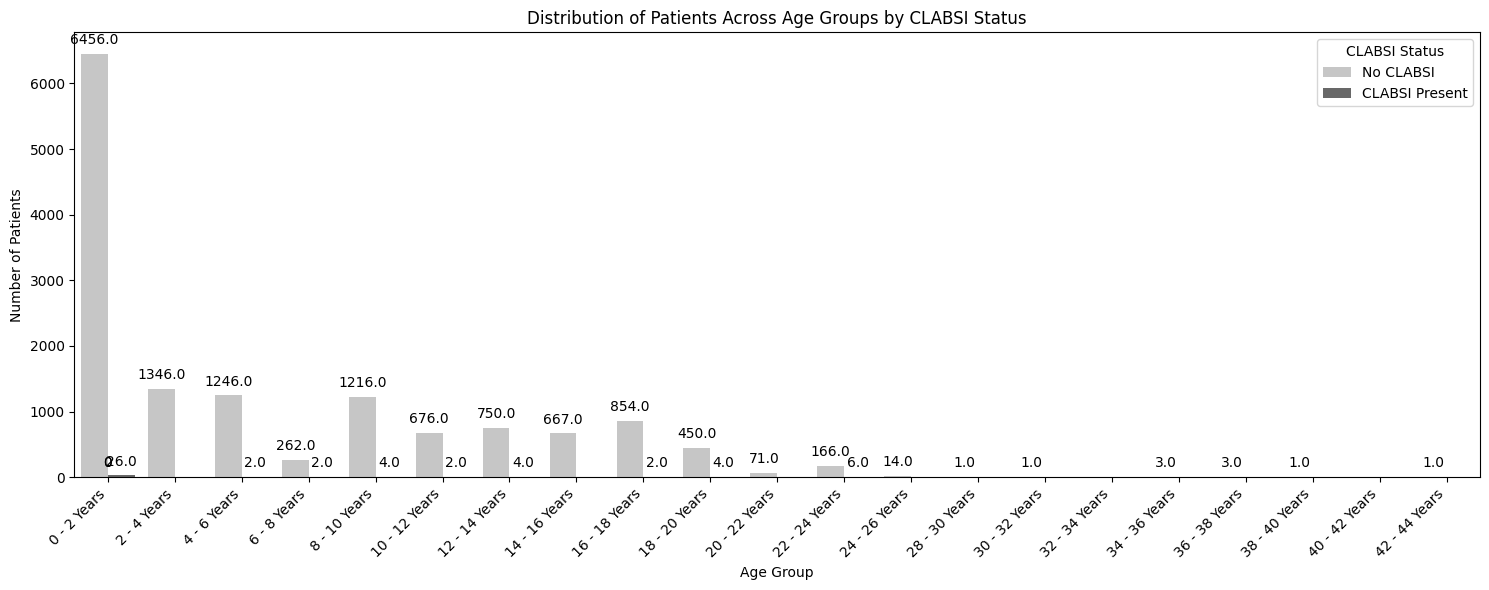

CLABSI Status  No CLABSI  CLABSI Present
AgeGroup                                
0 - 2 Years       6456.0            26.0
10 - 12 Years      676.0             2.0
12 - 14 Years      750.0             4.0
14 - 16 Years      667.0             NaN
16 - 18 Years      854.0             2.0
18 - 20 Years      450.0             4.0
2 - 4 Years       1346.0             NaN
20 - 22 Years       71.0             NaN
22 - 24 Years      166.0             6.0
24 - 26 Years       14.0             NaN
28 - 30 Years        1.0             NaN
30 - 32 Years        1.0             NaN
34 - 36 Years        3.0             NaN
36 - 38 Years        3.0             NaN
38 - 40 Years        1.0             NaN
4 - 6 Years       1246.0             2.0
42 - 44 Years        1.0             NaN
6 - 8 Years        262.0             2.0
8 - 10 Years      1216.0             4.0


In [13]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Define a specific order for age groups to ensure a consistent display in the plot
age_group_sequence = [
    '0 - 2 Years', '2 - 4 Years', '4 - 6 Years', '6 - 8 Years', '8 - 10 Years',
    '10 - 12 Years', '12 - 14 Years', '14 - 16 Years', '16 - 18 Years',
    '18 - 20 Years', '20 - 22 Years', '22 - 24 Years', '24 - 26 Years',
    '28 - 30 Years', '30 - 32 Years', '32 - 34 Years',
    '34 - 36 Years', '36 - 38 Years', '38 - 40 Years', '40 - 42 Years', '42 - 44 Years'
]

# Set the figure size for the plot
plt.figure(figsize=(15, 6))

# Generate a count plot to show the distribution of patients across age groups, categorized by CLABSI status
count_plot = sns.countplot(
    x='AgeGroup',
    hue='HasCLABSI',
    data=df_predicting_clabsi,
    order=age_group_sequence,
    palette='Greys'
)

# Annotate each bar with the corresponding count value
for bar in count_plot.patches:
    count_plot.annotate(
        f'{bar.get_height()}',
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=10
    )

# Set the plot title and axis labels
plt.title('Distribution of Patients Across Age Groups by CLABSI Status')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='CLABSI Status', labels=['No CLABSI', 'CLABSI Present'])  # Update legend labels
plt.tight_layout()  # Adjust layout to avoid label cutoff
plt.show()

# Summarize the number of patients per age group and CLABSI status
age_clabsi_summary = df_predicting_clabsi.groupby(['AgeGroup', 'HasCLABSI']).size().reset_index(name='PatientCount')

# Reformat the summary into a structured table
age_clabsi_summary_table = age_clabsi_summary.pivot(index='AgeGroup', columns='HasCLABSI', values='PatientCount')

# Rename columns for improved clarity
age_clabsi_summary_table.columns.name = 'CLABSI Status'
age_clabsi_summary_table = age_clabsi_summary_table.rename(columns={False: 'No CLABSI', True: 'CLABSI Present'})

# Display the summarized data
print(age_clabsi_summary_table)


#### Hospital Day Distribution Visualization

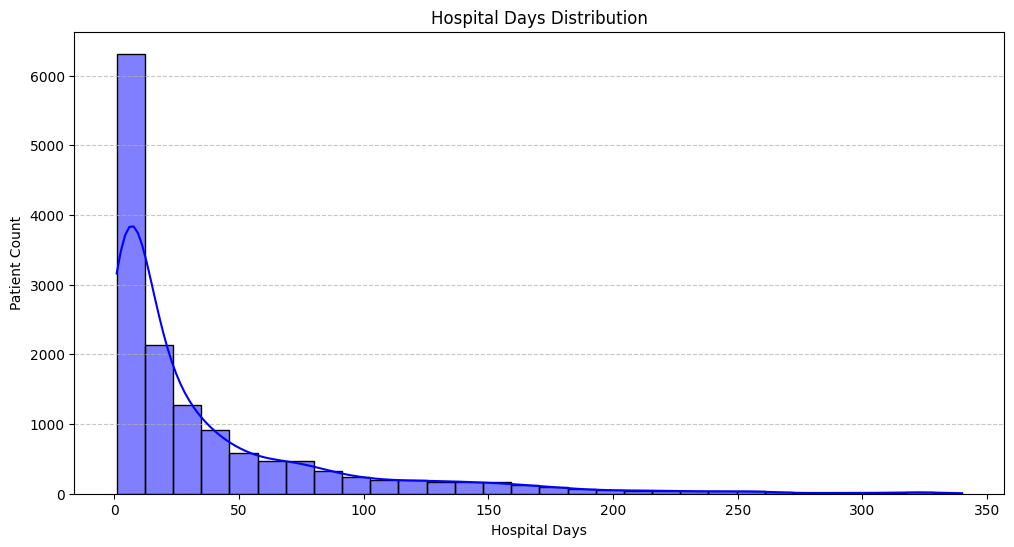

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of hospital stay duration (HospitalDay)
plt.figure(figsize=(12, 6))
sns.histplot(df_predicting_clabsi['HospitalDay'], bins=30, kde=True, color='blue')

# Set the title and axis labels
plt.title('Hospital Days Distribution')
plt.xlabel('Hospital Days')
plt.ylabel('Patient Count')

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


#### Patients Distribution by Hospital Departments Visualization

/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2987477290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='DepartmentDSC', data=df_predicting_clabsi, palette='Blues_d')
/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2987477290.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


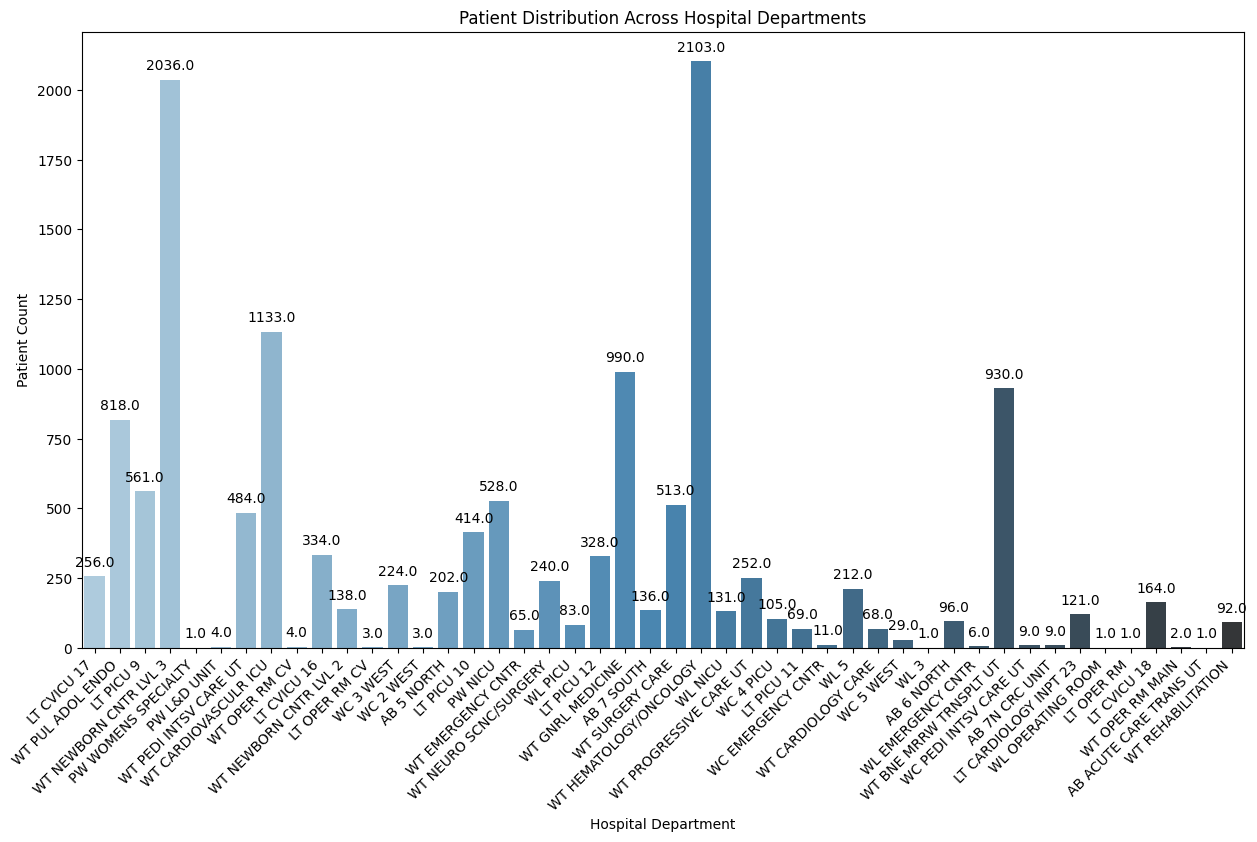

In [15]:
# Visualizing the distribution of patients across different hospital departments (DepartmentDSC)
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='DepartmentDSC', data=df_predicting_clabsi, palette='Blues_d')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the plot title and axis labels
plt.title('Patient Distribution Across Hospital Departments')
plt.xlabel('Hospital Department')
plt.ylabel('Patient Count')

# Annotate each bar with the corresponding patient count
for bar in ax.patches:
    ax.annotate(
        f'{bar.get_height()}',  # Display the count on top of each bar
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position at the center of the bar
        ha='center',  # Align text horizontally
        va='center',  # Align text vertically
        xytext=(0, 10),  # Offset text slightly above the bar
        textcoords='offset points',  # Use offset points for positioning
        fontsize=10  # Set font size for readability
    )

# Show the plot
plt.show()


#### Correlation Matrix visualizations

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Ensure categorical encoding for 'AgeGroup' (if present)
if 'AgeGroup' in df_predicting_clabsi.columns:
    df_predicting_clabsi = pd.get_dummies(df_predicting_clabsi, columns=['AgeGroup'], prefix='AgeGroup')

# Ensure 'HasCLABSI' is properly formatted as binary
df_predicting_clabsi['HasCLABSI'] = df_predicting_clabsi['HasCLABSI'].astype(int)

# Check if selected_columns exists, otherwise define it dynamically
if 'selected_columns' not in globals():
    selected_columns = df_predicting_clabsi.columns[df_predicting_clabsi.columns != 'HasCLABSI'].tolist()

# Filter out missing columns
selected_columns = [col for col in selected_columns if col in df_predicting_clabsi.columns]

# Ensure selected_columns is not empty
if not selected_columns:
    raise ValueError("No valid features found in the dataset! Check column names.")

# Define features (X) and target variable (y)
X = df_predicting_clabsi[selected_columns]
y = df_predicting_clabsi['HasCLABSI']

# Handle missing and infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  
X.fillna(X.mean(), inplace=True)  

# Confirm missing values are handled
print("Missing values after handling:\n", X.isnull().sum())

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/1417960003.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/1417960003.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Missing values after handling:
 HasCLABSI                   0
DaysToCLABSI                0
HasFutureEncounterCLABSI    0
LineDaysPICC                0
FlushedLast7                0
ICUDaysLast30               0
CountMedicationsLast30      0
DiagnosisInfectionLast30    0
AgeGroup_10 - 12 Years      0
AgeGroup_12 - 14 Years      0
AgeGroup_14 - 16 Years      0
AgeGroup_16 - 18 Years      0
AgeGroup_18 - 20 Years      0
AgeGroup_2 - 4 Years        0
AgeGroup_20 - 22 Years      0
AgeGroup_22 - 24 Years      0
AgeGroup_24 - 26 Years      0
AgeGroup_28 - 30 Years      0
AgeGroup_30 - 32 Years      0
AgeGroup_34 - 36 Years      0
AgeGroup_36 - 38 Years      0
AgeGroup_38 - 40 Years      0
AgeGroup_4 - 6 Years        0
AgeGroup_42 - 44 Years      0
AgeGroup_6 - 8 Years        0
AgeGroup_8 - 10 Years       0
dtype: int64
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2836
           1       1.00      1.00      1.00        12

    accurac

#### Correlation Matrix for selected variables

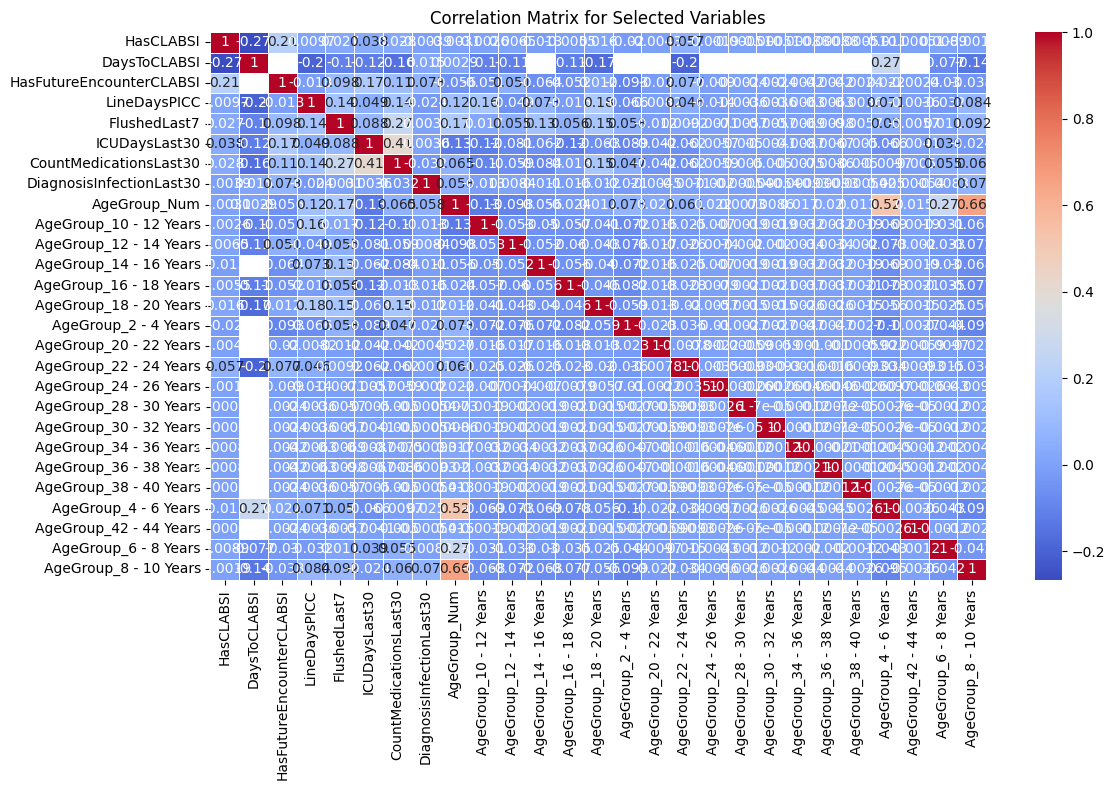

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'AgeGroup' to a numeric format using one-hot encoding for correlation analysis
df_predicting_clabsi = pd.get_dummies(df_predicting_clabsi, columns=['AgeGroup'], drop_first=True)

# Selecting key variables related to CLABSI history and clinical interventions
# These are variables that are clinically relevant and have shown to contribute to CLABSI
selected_columns = [
    'HasCLABSI',          # Target variable indicating whether the patient had CLABSI
    'DaysToCLABSI',       # Days until CLABSI occurs, a time-to-event measure
    'HasFutureEncounterCLABSI', # Indicates if the patient will have CLABSI in future encounters
    'LineDaysPICC',       # Number of days a central line (PICC) has been in place, a known risk factor
    'FlushedLast7',       # Whether the central line was flushed in the last 7 days
    'ICUDaysLast30',      # Days the patient spent in the ICU in the last 30 days, a risk factor
    'CountMedicationsLast30',  # Number of medications administered in the last 30 days
    'DiagnosisInfectionLast30' # Infection diagnoses in the last 30 days, related to CLABSI risk
]

# Adding one-hot encoded columns for 'AgeGroup' to the selected columns for correlation analysis
# These one-hot encoded variables represent different age groups as binary variables
agegroup_columns = [col for col in df_predicting_clabsi.columns if 'AgeGroup' in col]
selected_columns += agegroup_columns

# Creating a correlation matrix with the selected columns
correlation_matrix = df_predicting_clabsi[selected_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Selected Variables')
plt.tight_layout()

# Show the plot to visualize the relationships between the variables
plt.show()


### Correlation Matrix Explanation

To analyze the relationship between key variables linked to CLABSI (Central Line-Associated Bloodstream Infections) in the dataset, a correlation matrix was generated. This matrix helps identify strong associations between variables, providing valuable insights for selecting relevant features and building predictive models. Understanding these correlations is crucial, as it can enhance the accuracy and effectiveness of the model while ensuring that the most impactful factors are considered in the analysis.


#### Why Correlation Matrix
The correlation matrix helps assess the strength and direction of relationships between numerical variables. Understanding these connections is essential for refining model performance and ensuring data-driven decision-making. Specifically, it allows us to:

Identify Multicollinearity: When variables are highly correlated, they may carry redundant information, which can negatively impact machine learning models, especially linear models. Multicollinearity can lead to instability in model coefficients and reduce interpretability. By identifying and removing one of the highly correlated variables, we can simplify the model without losing critical information.

Enhance Feature Selection: The correlation matrix helps pinpoint variables that have a strong relationship with the target variable (HasCLABSI). Features with high correlation to the outcome can serve as key predictors, improving the model’s ability to identify potential CLABSI cases more accurately.

Boost Model Performance: Selecting the most relevant features based on their correlation with the target variable can help reduce noise, prevent overfitting, and ultimately improve model accuracy. By eliminating irrelevant or redundant variables, the model becomes more efficient, leading to more reliable predictions.

#### Variables Chosen for Correlation
To assess the potential impact on CLABSI (Central Line-Associated Bloodstream Infections) and their clinical relevance, we identified key variables for analysis:

HasCLABSI: The primary target variable indicating whether a patient has developed CLABSI.

DaysToCLABSI: Represents the number of days before a patient contracts CLABSI, providing insights into the infection’s time-to-event characteristics.
HasFutureEncounterCLABSI: Helps evaluate long-term risk patterns by indicating whether a patient is likely to develop CLABSI in the future.

LineDaysPICC: Captures the duration of PICC (Peripherally Inserted Central Catheter) line therapy. Prolonged use of a central line is a known risk factor for CLABSI, as extended exposure increases infection risk.

FlushedLast7: Indicates whether the central line was flushed in the past seven days. Regular flushing is a preventive measure, and neglecting it may elevate the risk of infection.

ICUDaysLast30: Tracks the number of days a patient spent in the Intensive Care Unit (ICU) over the last 30 days. ICU patients are more vulnerable to infections due to their critical condition and frequent invasive procedures.

CountMedicationsLast30: Represents the number of medications administered in the past 30 days. Patients on multiple medications often have complex medical conditions, which may increase infection susceptibility.

DiagnosisInfectionLast30: Identifies whether the patient had other infections within the last 30 days. The presence of concurrent infections can further compromise immunity, increasing the risk of CLABSI.

AgeGroup: Categorizes patients into different age groups, as age is a crucial factor in infection susceptibility. One-hot encoding is applied to analyze whether specific age groups exhibit a stronger association with CLABSI.

By selecting these variables, we aim to capture the most influential factors contributing to CLABSI risk, improving predictive modeling and clinical decision-making.


#### Key Insights from the Correlation Matrix
Target Variable Focus (HasCLABSI): Our primary interest lies in understanding how different variables relate to HasCLABSI. Features with stronger correlations to this target variable are likely to be more predictive, making them valuable candidates for inclusion in our model.

Eliminating Redundant Features: When two variables are highly correlated, they may carry overlapping information. To avoid redundancy, improve model simplicity, and enhance performance, we may consider removing one of the highly correlated variables—such as choosing between PastCLABSIs and HadPreviousCLABSI.

Clinical Relevance: The selected variables are chosen based on their clinical significance in predicting CLABSI. By combining insights from the correlation matrix with expert domain knowledge, we can make informed decisions on which features to retain or exclude, ensuring the model remains both statistically sound and clinically meaningful.

#### Conclusion
The correlation matrix plays a crucial role in identifying relationships between variables and ensuring that our dataset remains relevant and well-structured for model development. By addressing multicollinearity and focusing on features with strong correlations to the target variable, we can streamline our dataset, reducing redundancy while preserving essential predictive power. This approach allows us to build a more efficient and accurate CLABSI prediction model with an optimized set of features.


## Patient Occurrence

#### Statistics Calculations for numeric columns

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Remove identifier columns
df_without_keys = df_predicting_clabsi.drop(['PatientKey', 'EncounterKey'], axis=1)

# Select only numeric columns (this will exclude strings)
numeric_columns = df_without_keys.select_dtypes(include=[np.number])

# Initialize an empty DataFrame to store the statistics
statistics_df = pd.DataFrame()

# Calculating the  statistics for each numeric column
statistics_df['mean'] = numeric_columns.mean()
statistics_df['median'] = numeric_columns.median()
statistics_df['standard_deviation'] = numeric_columns.std()
statistics_df['standard_error'] = numeric_columns.sem()
statistics_df['mode'] = numeric_columns.mode().iloc[0]  # Mode can have multiple values; we take the first mode
statistics_df['skewness'] = numeric_columns.skew()
statistics_df['kurtosis'] = numeric_columns.kurtosis()
statistics_df['variance'] = numeric_columns.var()
statistics_df['sum'] = numeric_columns.sum()
statistics_df['count'] = numeric_columns.count()
statistics_df['min'] = numeric_columns.min()
statistics_df['max'] = numeric_columns.max()
statistics_df['range'] = numeric_columns.max() - numeric_columns.min()

# Display the statistics DataFrame
print(statistics_df)


                    mean  median  standard_deviation  standard_error  mode  \
HospitalDay    37.808865    16.0           52.367176        0.438900   1.0   
LineCount       1.179615     1.0            0.485383        0.004068   1.0   
LineDay        84.560410    23.0          191.679034        1.606500   1.0   
DaysToCLABSI   35.891125    28.0           29.816257        0.901868   0.0   
PastCLABSIs     0.108598     0.0            0.375216        0.003145   0.0   
...                  ...     ...                 ...             ...   ...   
ICUDaysLast15   3.567856     0.0            5.518786        0.046254   0.0   
ICUDaysLast5    1.475485     0.0            2.128807        0.017842   0.0   
ICUDaysLast3    0.934883     0.0            1.332067        0.011164   0.0   
ICUDaysLast2    0.642315     0.0            0.910874        0.007634   0.0   
AgeGroup_Num    4.583450     1.0            6.236966        0.052273   0.0   

               skewness   kurtosis      variance        sum  co

**HospitalDay:**  
The duration of hospital stays varies significantly among patients. The median stay is **16 days**, meaning half of the patients are discharged within this period. However, the **average stay is 37.81 days**, indicating that some patients remain hospitalized much longer. A **skewness of 2.39** suggests a strong rightward skew, where a small subset of patients have prolonged hospitalizations. Additionally, a **kurtosis of 6.52** points to extreme outliers, emphasizing substantial variation in hospital stay lengths. Overall, hospitalization durations range from **1 to 340 days**, covering a total period of **339 days**.

**LineCount:**  
The number of medical lines (e.g., IVs, catheters) per patient shows variability. The median is **1 line**, indicating that most patients require a single line. However, the **average is 1.18**, suggesting that some patients need multiple lines. A **skewness of 3.33** highlights a significant rightward skew, meaning a small group of patients receive considerably more lines than the norm. The **kurtosis of 13.67** further confirms the presence of extreme values. Overall, the number of medical lines per patient varies between **1 and 5**.

**LineDay:**  
The duration of medical line usage differs widely. While the **median is 23 days**, the **average is 84.56 days**, indicating that a subset of patients require lines for an extended period. A **skewness of 5.63** reveals a strong rightward skew, meaning a few patients have significantly longer line durations. The **kurtosis of 46.72** confirms the presence of extreme outliers. Overall, medical line usage spans from **1 day to a maximum of 2,873 days**.

**DaysToCLABSI:**  
On average, CLABSI develops **35.89 days** after infection, with a median onset time of **28 days**, meaning half of the cases occur within this timeframe. While most infections develop relatively quickly, some cases take significantly longer. A **skewness of 0.81** indicates a slight rightward skew, suggesting occasional delays in CLABSI onset. The **standard deviation of 29.82** reflects considerable variability, with infection times ranging from **0 to 122 days**.

**PastCLABSIs:**  
The majority of patients have no prior CLABSI history, as reflected by a median of **0** past occurrences. The **average number of past infections is 0.11**, indicating that previous episodes are relatively rare. However, a **skewness of 3.66** suggests a strong rightward skew, meaning that while most patients have never had CLABSI, a small subset has experienced multiple infections. Some patients have had up to **two prior CLABSI episodes**, highlighting recurrent infections in a limited number of cases.

**CVICUDaysLast30:**  
In the last **30 days**, patients spent an **average of 2.54 days** in the Cardiovascular ICU (CVICU). However, the **median is 0 days**, meaning most patients did not require CVICU care. A **skewness of 3.03** suggests a strong rightward skew, with a few patients experiencing significantly longer stays. The total time spent in the CVICU over the past 30 days ranges from **0 to 30 days**.

**ICUDaysLast15:**  
Over the past **15 days**, patients spent an **average of 3.57 days** in the ICU. However, the **median of 0 days** suggests that most patients did not require ICU care during this period. A **skewness of 1.27** indicates a moderate rightward skew, meaning some patients had extended ICU stays while many had little or none. ICU stays in this period range from **0 to 15 days**.

**ICUDaysLast5:**  
In the last **five days**, patients spent an **average of 1.48 days** in the ICU, but the **median of 0 days** suggests that most patients did not need ICU care. A **skewness of 0.91** indicates a moderate rightward skew, with a small subset of patients experiencing extended ICU stays. The duration of ICU stays during this period ranges from **0 to 5 days**.

**ICUDaysLast3:**  
The median ICU stay over the past **three days** is **0 days**, indicating that most patients did not require ICU care. The **average ICU stay is 0.93 days**, with a **skewness of 0.81**, suggesting a moderate rightward skew. The duration of ICU stays during this timeframe ranges from **0 to 3 days**, with limited variability.

**ICUDaysLast2:**  
Over the last **two days**, patients spent an **average of 0.64 days** in the ICU. However, the **median of 0 days** suggests that most patients did not require ICU care. A **skewness of 0.77** indicates a slight rightward skew, meaning that while some patients had extended ICU stays, most had little or none. ICU stays in this period range from **0 to 2 days**, reflecting minimal ICU treatment recently.

## CLABSI distribution

Proportion of CLABSI cases (HasCLABSI):
HasCLABSI
False    0.996347
True     0.003653
Name: proportion, dtype: float64


/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2284344102.py:6: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_predicting_clabsi = pd.read_csv('bzan6361_clabsi_1.csv')
/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2284344102.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_proportions.index, y=class_proportions.values, palette='Set1')


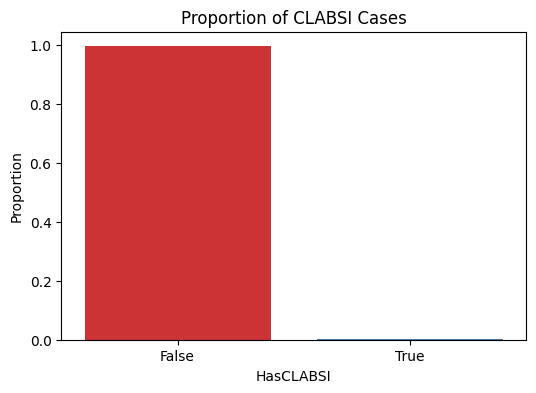

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame (replace 'your_file.csv' with the actual file path)
df_predicting_clabsi = pd.read_csv('bzan6361_clabsi_1.csv')

# Calculate the proportion of each class in 'HasCLABSI'
class_proportions = df_predicting_clabsi['HasCLABSI'].value_counts(normalize=True)

# Display the class proportions
print("Proportion of CLABSI cases (HasCLABSI):")
print(class_proportions)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values, palette='Set1')
plt.title('Proportion of CLABSI Cases')
plt.xlabel('HasCLABSI')
plt.ylabel('Proportion')
plt.show()

### Class Imbalance Challenge
The dataset exhibits class imbalance, which is a critical factor in CLABSI prediction. Without proper handling, the model may become biased toward the majority class (non-CLABSI cases), leading to skewed and less reliable predictions.

Approach to Address Imbalance
Resampling Techniques: To create a more balanced dataset, methods such as undersampling (reducing the majority class) or oversampling (increasing the minority class, e.g., using SMOTE) can be applied.

Class Weight Adjustment: Machine learning models like Random Forest and Logistic Regression can assign higher weights to the minority class, improving the model’s ability to correctly identify CLABSI cases and enhance overall prediction accuracy.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Ensure categorical encoding (if needed)
if 'AgeGroup' in df_predicting_clabsi.columns:
    df_predicting_clabsi = pd.get_dummies(df_predicting_clabsi, columns=['AgeGroup'], prefix='AgeGroup')

# Validate selected features exist in the DataFrame
selected_columns = [col for col in selected_columns if col in df_predicting_clabsi.columns]

if not selected_columns:
    raise ValueError("No valid features found in the dataset!")

# Define features (X) and target variable (y)
X = df_predicting_clabsi[selected_columns]
y = df_predicting_clabsi['HasCLABSI']

# Handle missing and infinite values
X.replace([np.inf, -np.inf], np.nan, inplace=True)  
X.fillna(X.mean(), inplace=True)  

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2836
        True       1.00      1.00      1.00        12

    accuracy                           1.00      2848
   macro avg       1.00      1.00      1.00      2848
weighted avg       1.00      1.00      1.00      2848



/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2704289014.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/2704289014.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


### Managing Class Imbalance in CLABSI Prediction

After conducting the correlation analysis to identify the most relevant features for CLABSI prediction, we addressed the issue of class imbalance in the dataset. The data is highly imbalanced, with a small number of positive CLABSI cases (True) and a significant majority of negative cases (False). If left unaddressed, this imbalance could lead the model to favor the majority class, reducing its ability to accurately detect CLABSI cases. To ensure a fair and effective predictive model, it is essential to implement strategies that mitigate this bias and improve the model's sensitivity to the minority class.

#### Why We Handle Imbalance After Correlation
Since correlation analysis is aimed at understanding the relationships between variables, we addressed class imbalance only after completing the correlation analysis. This approach ensures that we analyze these correlations within the original dataset, without altering its structure. Handling imbalance too early—such as through oversampling—could artificially inflate or distort correlations, leading to misleading insights. By first identifying the most relevant features and then addressing imbalance, we ensure that our feature selection process is based on a clean and unbiased dataset, improving the reliability of our predictive model.

#### Why We Chose Class Weighting
To address class imbalance, we opted for class weighting as our primary strategy. This method is a simple yet effective approach that enhances the model’s focus on the minority class (CLABSI-positive cases) without altering the dataset itself.

Advantages of Class Weighting
Maintains Data Integrity: Unlike oversampling, which duplicates minority class instances, or undersampling, which removes majority class instances, class weighting preserves the original data distribution, ensuring that the dataset remains unchanged.
Seamless Integration with Models: Many machine learning models, including RandomForestClassifier, have built-in support for class weighting. This allows for a straightforward implementation without the need for complex data preprocessing.
Minimizes Overfitting Risk: Unlike oversampling, which can lead to overfitting in small datasets, class weighting does not introduce duplicate data, reducing the risk of the model memorizing patterns rather than generalizing effectively.
By applying class_weight='balanced', the model automatically assigns higher importance to CLABSI-positive cases during training, improving its ability to detect infections while maintaining strong performance for the majority class.

#### Final Model Evaluation
To evaluate the model’s performance, we prioritized metrics such as precision, recall, and F1-score, which provide more meaningful insights than accuracy when working with imbalanced datasets. Additionally, we analyzed the confusion matrix and implemented cross-validation to ensure the model generalizes effectively to unseen data.

Overall, class weighting proved to be an effective solution for handling class imbalance. It allowed us to preserve the dataset’s integrity while ensuring that the model maintains balanced predictions, improving its ability to accurately identify both majority and minority class cases.

In [33]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation to check for generalization
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print("F1 scores from 5-fold cross-validation:", scores)
print("Mean F1 score:", scores.mean())




F1 scores from 5-fold cross-validation: [1. 1. 1. 1. 1.]
Mean F1 score: 1.0


/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/3108144995.py:6: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('bzan6361_clabsi_1.csv')
/var/folders/bz/yy2_kxbd7wb__zd2gtczhjv00000gn/T/ipykernel_30023/3108144995.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


First few rows of the dataset:
   PatientKey  EncounterKey        Date    InsertionDate       AgeGroup  \
0      887558       7883287  2019-04-02    4/2/2019 0:00   8 - 10 Years   
1     2874369       6865957  2018-10-30  10/30/2018 0:00   8 - 10 Years   
2     2684699       4336219  2017-08-24   8/24/2017 0:00  14 - 16 Years   
3     2975875       8111296  2019-05-18   5/18/2019 0:00    0 - 2 Years   
4      861659       8126379  2019-05-22   5/22/2019 0:00   8 - 10 Years   

      DepartmentDSC  HospitalDay  \
0       LT CVICU 17            1   
1       LT CVICU 17            1   
2  WT PUL ADOL ENDO            5   
3         LT PICU 9            2   
4       LT CVICU 17            1   

                                        LineDrainDSC  LineCount  LineDay  ...  \
0  [REMOVED] CVC Triple Lumen - 04/01/19 Right In...          1        1  ...   
1  [REMOVED] CVC Double Lumen - 10/29/18 Right In...          1        1  ...   
2        PICC Single Lumen - 08/23/17 Right Upperarm      

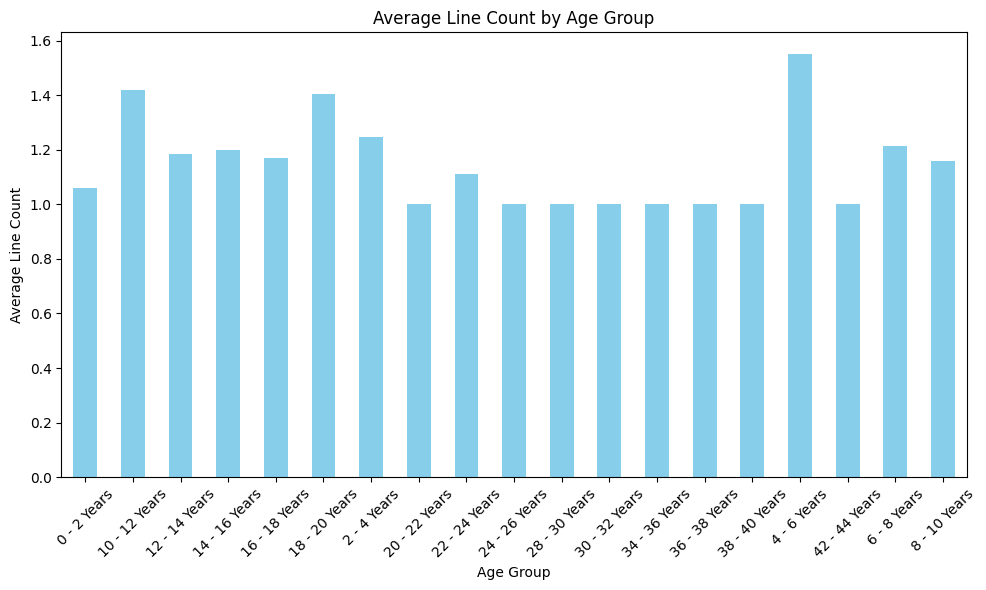

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Data
data = pd.read_csv('bzan6361_clabsi_1.csv')
# Step 2: Explore the Data
print("First few rows of the dataset:")
print(data.head())
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 3: Data Preprocessing
# Fill missing values using forward fill method (you can choose a different method if preferred)
data.fillna(method='ffill', inplace=True)

# Step 4: Create Panel Data Structure
# Set a multi-index with PatientKey and Date
data.set_index(['PatientKey', 'Date'], inplace=True)
data.sort_index(inplace=True)

# Step 5: Analysis Examples
# Example 1: Analyze CLABSI Incidence
clabsi_incidence = data['HasCLABSI'].value_counts(normalize=True)
print("\nCLABSI Incidence:")
print(clabsi_incidence)

# Example 2: Group Data by Age Group
age_group_analysis = data.groupby('AgeGroup')['LineCount'].mean()
print("\nAverage Line Count by Age Group:")
print(age_group_analysis)


# Step 6: Visualizations
# Example visualization: Average Line Count by Age Group
plt.figure(figsize=(10, 6))
age_group_analysis.plot(kind='bar', color='skyblue')
plt.title('Average Line Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Line Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## References

> Wylie, M. C., Graham, D. A., Potter-Bynoe, G., Kleinman, M. E., Randolph, A. G., Costello, J. M., & Sandora, T. J. (2010). Risk Factors for Central Line–Associated Bloodstream Infection in Pediatric Intensive Care Units. Infection Control & Hospital Epidemiology, 31(10), 1049–1056. doi:10.1086/656246

> Alexis M. Elward, Christopher S. Hollenbeak, David K. Warren, Victoria J. Fraser; Attributable Cost of Nosocomial Primary Bloodstream Infection in Pediatric Intensive Care Unit Patients. Pediatrics April 2005; 115 (4): 868–872. 10.1542/peds.2004-0256